In [ ]:
!pip install tensorflow -q

In [ ]:
from tensorflow import keras
import tensorflow as tf
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

In [ ]:
# get FMNIST handwritten digits image training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# normalize data (each pixel starts as int 0-255; we want it to be a float between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

<Figure size 640x480 with 0 Axes>

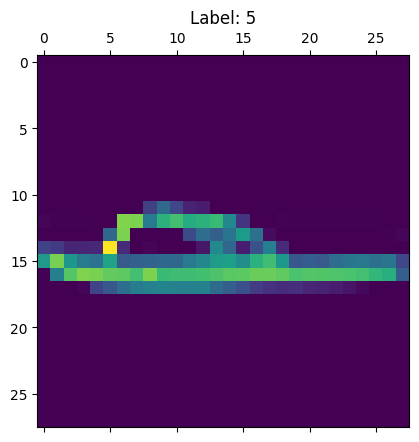

<Figure size 640x480 with 0 Axes>

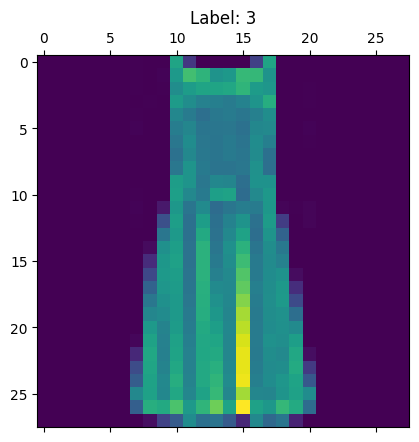

<Figure size 640x480 with 0 Axes>

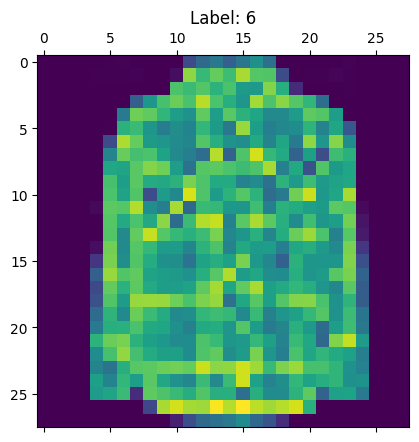

<Figure size 640x480 with 0 Axes>

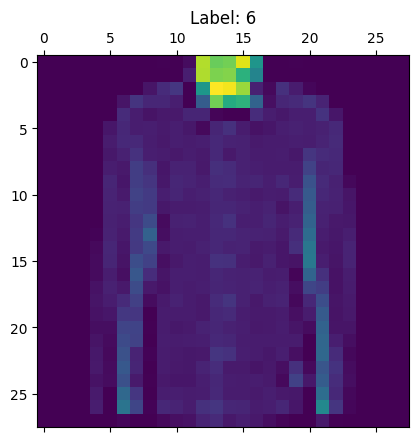

<Figure size 640x480 with 0 Axes>

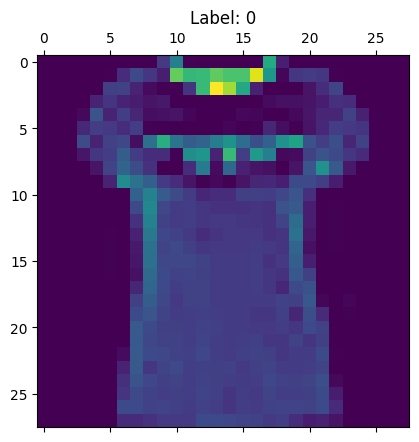

In [ ]:
# show sample images

for i in range(30,35):
    plt.figure()
    plt.matshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')


In [ ]:
# let's train a perceptron on these images

# first, we need to flatten our images (from 2d into a 1d array)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# create and train the perceptron
perceptron = Perceptron()
perceptron.fit(x_train_flat, y_train)

# print train and test accuracy scores
print(f"Training data score: {perceptron.score(x_train_flat, y_train)}")
print(f"Testing data score: {perceptron.score(x_test_flat, y_test)}")


Training data score: 0.8051166666666667
Testing data score: 0.7834


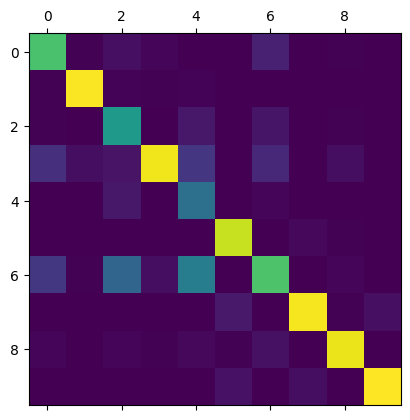

In [ ]:
# let's see the confusion matrix
plt.matshow( confusion_matrix( perceptron.predict(x_test_flat), y_test ) )

In [ ]:
# let's use tensorflow keras library to build a 10 perceptron model
#  Dense layers are standard fully-interconnected neural network layers
model = keras.models.Sequential([
    keras.layers.Dense(10, activation='softmax') # output layer
])

# we'll use sparse_categorical_crossentropy as the loss function
LOSS_FN = keras.losses.sparse_categorical_crossentropy

# compile the model with standard backprop training algorithm called 'adam'
model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

# train on training data, and validate on test data
# we'll train for 5 epochs
model.fit(x_train_flat, y_train, epochs=5, validation_data=(x_test_flat, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6021 - accuracy: 0.7969 - val_loss: 0.5114 - val_accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4618 - accuracy: 0.8417 - val_loss: 0.4811 - val_accuracy: 0.8335
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4349 - accuracy: 0.8509 - val_loss: 0.4625 - val_accuracy: 0.8373
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4227 - accuracy: 0.8551 - val_loss: 0.4558 - val_accuracy: 0.8408
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4133 - accuracy: 0.8571 - val_loss: 0.4583 - val_accuracy: 0.8419


313/313 [==============================] - 0s 854us/step


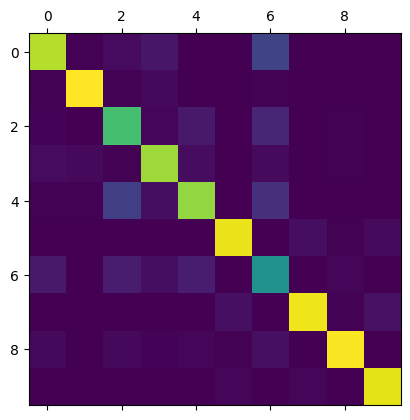

In [ ]:
# let's check the confusion matrix
plt.matshow( confusion_matrix( model.predict(x_test_flat).argmax(1), y_test ) )

In [ ]:
# Create a list of models Name
modelNames = []

# in all models we'll have the same number of nodes per hidden layer
NODES_PER_HIDDEN_LAYER = 64

#this is to create for model with number of dense layer and conv + dense layer, it creates total of 2 times n models for us
numberOfModelForEachCat = 3

denseNumRandom = random.sample(range(0, 3), numberOfModelForEachCat)
denseNumRandom.sort()
modelNames = [ str(num) + 'd' for num in denseNumRandom]

# Create a list of models
models = []

for num_dense_layers in denseNumRandom:
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  # Add hidden layers
  for _ in range(num_dense_layers):
    model.add(tf.keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'))
  # Add the output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
  models.append(model)

convNumRandom = random.sample(range(1, 3), numberOfModelForEachCat)
convNumRandom.sort()
denseNumRandom = random.sample(range(1, 3), numberOfModelForEachCat)
denseNumRandom.sort()
for conv_layers, dense_layers in zip(convNumRandom, denseNumRandom):
    modelNames.append(f"{conv_layers}c{dense_layers}d")

# Create models with convolutional and dense layers
for conv_layers, dense_layers in zip(convNumRandom, denseNumRandom):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

    # Add convolutional layers
    for _ in range(conv_layers):
        model.add(tf.keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation="relu"))

    model.add(tf.keras.layers.Flatten())

    # Add dense layers
    for _ in range(dense_layers):
        model.add(tf.keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'))

    # Add the output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    models.append(model)


In [ ]:
# compile all models
for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [ ]:
TRAINING_EPOCHS = 5

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(x_train, y_train, epochs=TRAINING_EPOCHS)


training model 2d
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8532 - accuracy: 0.6707
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5035 - accuracy: 0.8048
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3978 - accuracy: 0.8587
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3645 - accuracy: 0.8717
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3430 - accuracy: 0.8777
training model 3d
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 1.2326 - accuracy: 0.4566
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5962 - accuracy: 0.7907
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4707 - accuracy: 0.8431
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4251 - accuracy: 0.8563
Epoch 5/5
1875/1875 [==============================] - 

In [ ]:
# get all model accuracy scores on test data
scores = [model.evaluate(x_test,y_test)[1] for model in models]


313/313 [==============================] - 23s 72ms/step - loss: 0.3040 - accuracy: 0.8966


In [ ]:
# let's also add the perceptron score to our accuracy scores list
modelNames.insert(0, 'perceptron')
scores.insert(0, perceptron.score(x_test_flat, y_test) )

# print all models and scores
for name,score in zip(modelNames,scores):
    print(name, score)

perceptron 0.7834
2d 0.8629999756813049
3d 0.8515999913215637
7d 0.10000000149011612
1c2d 0.8932999968528748
2c6d 0.9110999703407288
7c7d 0.8966000080108643


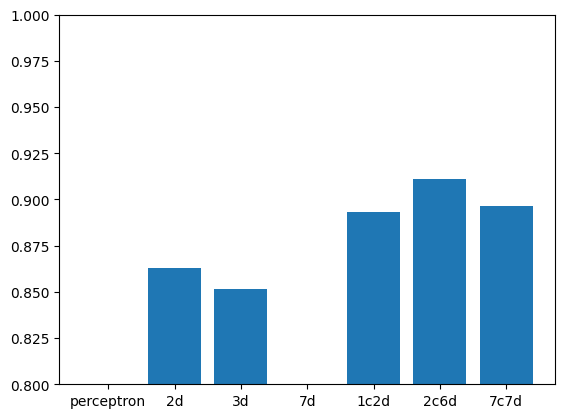

In [ ]:
# display as a bar chart
plt.bar(modelNames,scores)
plt.ylim(0.8, 1.0)
plt.show()